## Importing Libraries

In [5]:
import csv
from array import *
import numpy as np
import matplotlib.pyplot as plt 

## Reading Dataset

In [3]:
temp=[]
with open('forestfires.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    for row in readCSV:
        temp.append(row[8])

wind=[]
with open('forestfires.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    for row in readCSV:
        wind.append(row[10])

ffmc=[]
with open('forestfires.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    for row in readCSV:
        ffmc.append(row[4])
dc=[]
with open('forestfires.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    for row in readCSV:
        dc.append(row[6]) 
isi=[]
with open('forestfires.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    for row in readCSV:
        isi.append(row[7])
rh=[]
with open('forestfires.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    for row in readCSV:
        rh.append(row[9])                        

area=[]
with open('forestfires.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    for row in readCSV:
        area.append(row[12])   


## Defining Functions

In [4]:
def E_x_x(a, count):
	E_x_x_in = 0
	for i in range(1,401):
		E_x_x_in += float(a[i])**2
	E_x_x= E_x_x_in/count
	return E_x_x

def E_x_y(a, b, count):
	E_x_x_in = 0
	for i in range(1,401):
		E_x_x_in += float(a[i])*float(b[i])
	E_x_x= E_x_x_in/count
	return E_x_x

def output_A(arr1, arr2):
	mat1 = np.matrix(arr1)
	mat2 = np.matrix(arr2)
	inverse = mat1.I
	mat3= np.matmul(inverse, mat2)
	return mat3	

def y_estimated(area, x1, x2, a_para):
	y_est = []
	for i in range(401,518):
		#import pdb; pdb.set_trace()
		y_est_i = a_para[0]*float(x1[i]) + a_para[1]*float(x2[i])
		y_est.append(y_est_i)

	return y_est

def result_MSE(area, y_estimated):
	mse =0
	j=0
	for i in range(401,518):
		#import pdb; pdb.set_trace()
		mse += (float(area[i])-y_estimated[j])**2 
		j+=1
	mse_mean = mse/117
	return mse_mean	 



## Main Program

In [7]:
#---------------MSE for Temp and Wind------------#

print('1st estimator')

E_t_t = E_x_x(temp, 400)
E_w_w = E_x_x(wind, 400)
E_t_w = E_x_y(temp, wind, 400)
E_t_a = E_x_y(temp, area, 400)
E_w_a = E_x_y(wind, area, 400)


R = [[E_t_t, E_t_w], [E_t_w, E_w_w]]
print(R)
R_0 = [[E_t_a],[E_w_a]] 
print(R_0)
A_t_w = output_A(R,R_0)
print(A_t_w)
estimated_y1 = y_estimated(area, temp, wind, A_t_w)
mse_t_w = result_MSE(area, estimated_y1)
print(mse_t_w)
#print(estimated_y1[1])
#print(A_t_w[1])


#-------------MSE for FFMC and DC (4&6)------------#

print('2nd estimator')

E_f_f = E_x_x(ffmc, 400)
E_d_d = E_x_x(dc, 400)
E_f_d = E_x_y(ffmc, dc, 400)
E_f_a = E_x_y(ffmc, area, 400)
E_d_a = E_x_y(dc, area, 400)


R = [[E_f_f, E_f_d], [E_f_d, E_d_d]]
print(R)
R_0 = [[E_f_a],[E_d_a]] 
print(R_0)
A_f_d = output_A(R,R_0)
print(A_f_d)
estimated_y2 = y_estimated(area, ffmc, dc, A_f_d)
mse_f_d = result_MSE(area, estimated_y2)
print(mse_f_d)
#print(estimated_y1[1])
#print(A_t_w[1])


#-------------MSE for ISI and RH (7&9)------------#

print('3rd estimator')

E_i_i = E_x_x(isi, 400)
E_r_r = E_x_x(rh, 400)
E_i_r = E_x_y(isi, rh, 400)
E_i_a = E_x_y(isi, area, 400)
E_r_a = E_x_y(rh, area, 400)


R = [[E_i_i, E_i_r], [E_i_r, E_r_r]]
print(R)
R_0 = [[E_i_a],[E_r_a]] 
print(R_0)
A_i_r = output_A(R,R_0)
print(A_i_r)
estimated_y3 = y_estimated(area, isi, rh, A_f_d)
mse_i_r = result_MSE(area, estimated_y3)
print(mse_i_r)
#print(estimated_y1[1])
#print(A_t_w[1])

1st estimator
[[354.7126250000001, 68.59495000000001], [68.59495000000001, 18.66714999999999]]
[[235.9616749999999], [44.41123]]
[[ 0.70887235]
 [-0.22573522]]
[[5647.64089971]]
2nd estimator
[[8204.527650000005, 49613.05865000003], [49613.05865000003, 357161.86169999995]]
[[1060.0228925], [7201.831050000005]]
[[0.04541564]
 [0.01385541]]
[[5719.43112561]]
3rd estimator
[[97.52825000000004, 375.0602499999999], [375.0602499999999, 2151.1425]]
[[97.77650750000001], [437.0725499999998]]
[[0.67126708]
 [0.0861435 ]]
[[5948.84791416]]


## Plotting the Graph

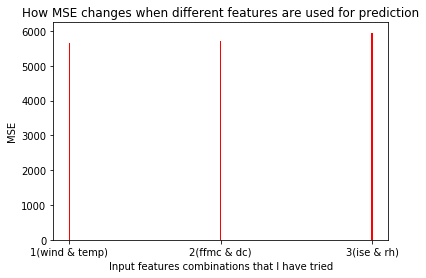

In [8]:
x_axis = [1, 2, 3] 
  
MSE = [mse_t_w.tolist()[0][0], mse_f_d.tolist()[0][0], mse_i_r.tolist()[0][0]]
  

tick_label = ['1(wind & temp)', '2(ffmc & dc)', '3(ise & rh)'] 
  
plt.bar(x_axis, MSE, tick_label = tick_label, 
        width = 0.01, color = ['red']) 

plt.xlabel('Input features combinations that I have tried') 
 
plt.ylabel('MSE') 

plt.title('How MSE changes when different features are used for prediction') 

plt.show()
